# Building an abstract of a web resource based on word importance

## Getting the text
We will do a real simple webscrape to get text for this exercise

Documentation:
* [Markdown Cheat Sheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
* [urllib](https://docs.python.org/3/library/urllib.html)
* [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
* [NLTK](https://www.nltk.org/)
* [string module](https://docs.python.org/2/library/string.html)
* [heapq module](https://docs.python.org/2/library/heapq.html)
* [collections module](https://docs.python.org/2/library/collections.html)
* [Pandas](https://pandas.pydata.org/)
* [matplotlib](https://matplotlib.org/)
* [WordCloud](http://amueller.github.io/word_cloud/)

In [1]:
# urllib is a package that collects several modules for working with URLs
# BeautifulSoup is a Python library for pulling data out of HTML and XML files

import urllib3
from bs4 import BeautifulSoup as bs

Create an instance of the Pool Manager to download web pages

In [3]:
http = urllib3.PoolManager()

Give the URL of the article you will download to the ```articleURL``` variable

In [4]:
articleURL="https://www.nytimes.com/2018/09/14/opinion/trump-base-polls.html"

In [5]:
page = http.request('GET',articleURL)

/Users/derekjackson/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


***Add certification to avoid this message***

In [6]:
import certifi
http = urllib3.PoolManager(cert_reqs='CERT_REQUIRED',ca_certs=certifi.where())

In [7]:
page.status

200

Note: `200` is good. This status code means the request was completed succesfully. `404` is a common code we see when a resource cannot be found. To see other status codes and their meaning refer to [MDN documentation](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status)

In [8]:
type(page.data)

bytes

We need to turn the code returned by our request into teext (i.e. a string) so that we can use NLTK.

In [9]:
article = page.data.decode('utf-8','ignore')

In [10]:
type(article)

str

note that for xml, BeutifulSoup can also parse XML:
``` BeautifulSoup(markup_text,'xml') ``` or ``` BeutifulSoup(markup_text,'lxml-xml') ```

Use the soup object to explpre the page. If it is well structured HTML there will only be one ```<h1>``` and that will be the title of the article.

In [11]:
soup = bs(article,'lxml')

In [12]:
soup.find_all('h1')

[<h1 class="css-1a8ugfg ejekc6u0" id="link-12279e86" itemprop="headline"><span>The Secret to Cracking Trump’s Base</span></h1>]

In [32]:
# Since there is only one we can use this to access the h1. The command returns the first instance of an element
soup.h1

<h1 class="css-1j7pjco ejekc6u0" id="link-12279e86" itemprop="headline"><span>The Secret to Cracking Trump’s Base</span></h1>

Good semantic HTML will use the ```<article>``` tag to nest the contents of the article's content. 

In [38]:
# calling the article as a function returns the inner contents and not the ```<article>``` tag itself
soup.article()


[<div class="ResponsiveAd-topAd--3uZAv" id="top-wrapper"><div class="ResponsiveAd-hide--3eu5-" id="top-slug"><p>Advertisement</p></div><div class="ad top-wrapper" style="text-align:center;height:100%;display:block;min-height:250px"><div id="top"></div></div></div>,
 <div class="ResponsiveAd-hide--3eu5-" id="top-slug"><p>Advertisement</p></div>,
 <p>Advertisement</p>,
 <div class="ad top-wrapper" style="text-align:center;height:100%;display:block;min-height:250px"><div id="top"></div></div>,
 <div id="top"></div>,
 <div class="css-1ysmpdz"><div class="css-163mhpl etb61u70"><a data-testid="story-section" href="https://www.nytimes.com/pages/opinion/index.html">Opinion</a></div></div>,
 <div class="css-163mhpl etb61u70"><a data-testid="story-section" href="https://www.nytimes.com/pages/opinion/index.html">Opinion</a></div>,
 <a data-testid="story-section" href="https://www.nytimes.com/pages/opinion/index.html">Opinion</a>,
 <header class="css-dm8bmq e345g291"><div class="ResponsiveAd-empty

In [39]:
# another method to find this element is 
soup.find('article')

<article class="Story-story--2QyGh css-1qk5cfn" id="story"><div class="ResponsiveAd-topAd--3uZAv" id="top-wrapper"><div class="ResponsiveAd-hide--3eu5-" id="top-slug"><p>Advertisement</p></div><div class="ad top-wrapper" style="text-align:center;height:100%;display:block;min-height:250px"><div id="top"></div></div></div><div class="css-1ysmpdz"><div class="css-163mhpl etb61u70"><a data-testid="story-section" href="https://www.nytimes.com/pages/opinion/index.html">Opinion</a></div></div><header class="css-dm8bmq e345g291"><div class="ResponsiveAd-emptyAd--3yMTH" id="sponsor-wrapper"><div class="ResponsiveAd-sponsoredByAdSlug--11gFU" id="sponsor-slug"><p>Supported by</p></div><div class="ad sponsor-wrapper" style="text-align:center;height:100%;display:block"><div id="sponsor"></div></div></div><h1 class="css-1j7pjco ejekc6u0" id="link-12279e86" itemprop="headline"><span>The Secret to Cracking Trump’s Base</span></h1><p class="css-1u56eiq ewc5vgb0">New polls show that some of the most har

To extract the text from this section use the ```text``` method.

In [40]:
soup.find('article').text

'AdvertisementOpinionSupported byThe Secret to Cracking Trump’s BaseNew polls show that some of the most hard-core Trumpsters are starting to get a clue. It might be because he finally crossed a line: He’s now insulting them.By Timothy EganContributing Opinion Writer Sept. 14, 2018ImagePresident Trump speaking to supporters in Sioux Falls, S.D., last week.CreditCreditDoug Mills/The New York TimesWe know that Donald Trump, the first president without a pet since James K. Polk, appears to hate dogs. And the feeling is mutual, according to one of his ex-wives. He also uses pooches as pejoratives when insulting women.Dogs, though known for their loyalty, can take only so much from one abusive human. Alas, the same cannot be said for the aging, white, rural and southern people who make up Trump’s base. He can lie to them, hurt them with tariffs, make a mockery of their values, suck up to freedom-hating dictators they once distrusted, and they’ll stick with him. Cult 45 is thought to be impe

```.find``` will only find the first instance of ```<artice>``` 

If there are other ```<article>``` tags those will need to be joined. To see all of the ```<aritcle>``` tags use ```find_all```

In [41]:
soup.find_all('article')
#we will see there is only one. Try finding all <p> tags after this

[<article class="Story-story--2QyGh css-1qk5cfn" id="story"><div class="ResponsiveAd-topAd--3uZAv" id="top-wrapper"><div class="ResponsiveAd-hide--3eu5-" id="top-slug"><p>Advertisement</p></div><div class="ad top-wrapper" style="text-align:center;height:100%;display:block;min-height:250px"><div id="top"></div></div></div><div class="css-1ysmpdz"><div class="css-163mhpl etb61u70"><a data-testid="story-section" href="https://www.nytimes.com/pages/opinion/index.html">Opinion</a></div></div><header class="css-dm8bmq e345g291"><div class="ResponsiveAd-emptyAd--3yMTH" id="sponsor-wrapper"><div class="ResponsiveAd-sponsoredByAdSlug--11gFU" id="sponsor-slug"><p>Supported by</p></div><div class="ad sponsor-wrapper" style="text-align:center;height:100%;display:block"><div id="sponsor"></div></div></div><h1 class="css-1j7pjco ejekc6u0" id="link-12279e86" itemprop="headline"><span>The Secret to Cracking Trump’s Base</span></h1><p class="css-1u56eiq ewc5vgb0">New polls show that some of the most ha

In [42]:
#check to see how many of an element there are
counter = 0
for i in soup.find_all('article'):
    counter = counter + 1
    
print (counter)

1


The article text looks pretty messy is there a better way to get the article text? perhaps focus on the ```<p>``` elements. 

This is an example of when subject matter expertise is valuable and why it is important to incorporate communication and understanding between the research and programming. You can also begin to see how bias and assumptions can creep into assesments of "objective" data. By omitting headings I am making a lot of assumptions and being aware of those assumptions is vital to understanding results, error, and our own subjectivity in research.

This is a consicous decision to make because it will exclude titles. However with our point system the headings will be weighted the same as a sentence and should be statistically insignificant.

In [43]:
soup.find_all('p')

[<p>Advertisement</p>,
 <p>Supported by</p>,
 <p class="css-1u56eiq ewc5vgb0">New polls show that some of the most hard-core Trumpsters are starting to get a clue. It might be because he finally crossed a line: He’s now insulting them.</p>,
 <p class="css-1bsd9ka e1x1pwtg1" itemid="" itemprop="author creator" itemscope="" itemtype="http://schema.org/Person">By<!-- --> <a class="css-luz7vr e1x1pwtg0" href="https://www.nytimes.com/by/timothy-egan"><span class="css-1baulvz" itemprop="name">Timothy Egan</span></a></p>,
 <p class="css-zilts3 e177ar5d1">Contributing Opinion Writer </p>,
 <p class="css-xhhu0i e2kc3sl0">We know that Donald Trump, the <a class="css-1g7m0tk" href="https://www.ajc.com/news/national/donald-trump-only-modern-president-without-pets-the-white-house/vay34FEHpNQqUh4WxAlzqM/" rel="noopener noreferrer" target="_blank" title="">first president without a pet</a> since James K. Polk, appears to hate dogs. And the feeling is mutual, according to one of his ex-wives. He also 

Let's get a count of how many paragraph elements we have. However before we start retyping all the code we had previously. Let's just put it into a function to make our lives easier.

In [44]:
def count_elem(el):
    counter = 0
    for i in soup.find_all(el):
        counter = counter + 1
    
    return (counter)

In [45]:
count_elem('p')

25

Let's take a look at the text too, but first we might want to make this a function as well.

In [46]:
def show_elem(el):
    for i in soup.find_all(el):
        print(i.text)

In [47]:
show_elem('p')

Advertisement
Supported by
New polls show that some of the most hard-core Trumpsters are starting to get a clue. It might be because he finally crossed a line: He’s now insulting them.
By Timothy Egan
Contributing Opinion Writer 
We know that Donald Trump, the first president without a pet since James K. Polk, appears to hate dogs. And the feeling is mutual, according to one of his ex-wives. He also uses pooches as pejoratives when insulting women.
Dogs, though known for their loyalty, can take only so much from one abusive human. Alas, the same cannot be said for the aging, white, rural and southern people who make up Trump’s base. He can lie to them, hurt them with tariffs, make a mockery of their values, suck up to freedom-hating dictators they once distrusted, and they’ll stick with him. Cult 45 is thought to be impermeable.
But surprise — a raft of new polls show that some of the most hard-core Trumpsters are starting to get a clue. I know, hold your applause. It’s like discoverin

This looks like a good set of text to use. Let's combine it into a string for processing.

In [48]:
text = ' '.join(map(lambda e: e.text, soup.find_all('p')))

In [49]:
type(text)


str

In [50]:
text

'Advertisement Supported by New polls show that some of the most hard-core Trumpsters are starting to get a clue. It might be because he finally crossed a line: He’s now insulting them. By Timothy Egan Contributing Opinion Writer  We know that Donald Trump, the first president without a pet since James K. Polk, appears to hate dogs. And the feeling is mutual, according to one of his ex-wives. He also uses pooches as pejoratives when insulting women. Dogs, though known for their loyalty, can take only so much from one abusive human. Alas, the same cannot be said for the aging, white, rural and southern people who make up Trump’s base. He can lie to them, hurt them with tariffs, make a mockery of their values, suck up to freedom-hating dictators they once distrusted, and they’ll stick with him. Cult 45 is thought to be impermeable. But surprise — a raft of new polls show that some of the most hard-core Trumpsters are starting to get a clue. I know, hold your applause. It’s like discoveri

## Applying this knowledge for easy webscraping with a function

Now that we have the pattern we would like to use we can enclose this all in a function to repeat it with differnet URLs.

In [54]:
def get_nyt_text(url):
    art = http.request('GET',url).data.decode('utf-8','ignore')
    sp = bs(art,'lxml')
    return (' '.join(map(lambda e: e.text, sp.find_all('p'))))
    

In [55]:
temp = 'https://www.nytimes.com/2018/08/31/opinion/egan-catholic-church-pope-francis.html'
test = get_nyt_text(temp)


In [56]:
test


'Advertisement Supported by Outside of condemning adulterous behavior, Christ never said anything about whom you could love.  By Timothy Egan Contributing Opinion Writer  One pope was a father of 10 through multiple mistresses, a man who purchased the papacy with mule-loads of silver. It is said that Alexander VI, the most debauched of the Borgia pontiffs, elected in 1492, even had an affair with one of his daughters. Another pope contracted syphilis during his reign — a “disease very fond of priests, especially rich priests,” as the saying went in Renaissance times. That was Julius II, known as “Il terrible.”  A third pope, Pius IX, added Flaubert’s “Madame Bovary” and John Stuart Mill’s book on the free market economy to the Vatican’s List of Prohibited Books during his long reign in the 19th century. He also formalized the doctrine of papal infallibility. What these Holy Fathers had in common was not just that they were badly flawed men putting forth badly flawed ideas: At the root 

## The Natural Language Processing part: Structuring the text

In [58]:
# NLTK (Natural Language Tool Kit) is the python library for Natural Language Processing 
import nltk
from string import punctuation

### Tokenizing the sentences

First we will begin by tokenizing the text into senteces. This tokenizer is based on a period (".") being followed by whitespace (" "). If the senteces do not have the space after them then this will join these sentences together. 

>I am hot.I am cold.

will become one token
```'I am hot.I am cold.'```

In [59]:
sents = nltk.sent_tokenize(text)

In [60]:
sents

['Advertisement Supported by New polls show that some of the most hard-core Trumpsters are starting to get a clue.',
 'It might be because he finally crossed a line: He’s now insulting them.',
 'By Timothy Egan Contributing Opinion Writer  We know that Donald Trump, the first president without a pet since James K. Polk, appears to hate dogs.',
 'And the feeling is mutual, according to one of his ex-wives.',
 'He also uses pooches as pejoratives when insulting women.',
 'Dogs, though known for their loyalty, can take only so much from one abusive human.',
 'Alas, the same cannot be said for the aging, white, rural and southern people who make up Trump’s base.',
 'He can lie to them, hurt them with tariffs, make a mockery of their values, suck up to freedom-hating dictators they once distrusted, and they’ll stick with him.',
 'Cult 45 is thought to be impermeable.',
 'But surprise — a raft of new polls show that some of the most hard-core Trumpsters are starting to get a clue.',
 'I know

In [61]:
sents[0:3]

['Advertisement Supported by New polls show that some of the most hard-core Trumpsters are starting to get a clue.',
 'It might be because he finally crossed a line: He’s now insulting them.',
 'By Timothy Egan Contributing Opinion Writer  We know that Donald Trump, the first president without a pet since James K. Polk, appears to hate dogs.']

In [62]:
for i in sents:
    print (i)

Advertisement Supported by New polls show that some of the most hard-core Trumpsters are starting to get a clue.
It might be because he finally crossed a line: He’s now insulting them.
By Timothy Egan Contributing Opinion Writer  We know that Donald Trump, the first president without a pet since James K. Polk, appears to hate dogs.
And the feeling is mutual, according to one of his ex-wives.
He also uses pooches as pejoratives when insulting women.
Dogs, though known for their loyalty, can take only so much from one abusive human.
Alas, the same cannot be said for the aging, white, rural and southern people who make up Trump’s base.
He can lie to them, hurt them with tariffs, make a mockery of their values, suck up to freedom-hating dictators they once distrusted, and they’ll stick with him.
Cult 45 is thought to be impermeable.
But surprise — a raft of new polls show that some of the most hard-core Trumpsters are starting to get a clue.
I know, hold your applause.
It’s like discoverin

### Tokenize the words
We will tokenize the words to all lower case. 

The ```.lower``` is simply a python method that transforms a string to lowercase characters

In [63]:
words = nltk.word_tokenize(text.lower())

In [64]:
words

['advertisement',
 'supported',
 'by',
 'new',
 'polls',
 'show',
 'that',
 'some',
 'of',
 'the',
 'most',
 'hard-core',
 'trumpsters',
 'are',
 'starting',
 'to',
 'get',
 'a',
 'clue',
 '.',
 'it',
 'might',
 'be',
 'because',
 'he',
 'finally',
 'crossed',
 'a',
 'line',
 ':',
 'he',
 '’',
 's',
 'now',
 'insulting',
 'them',
 '.',
 'by',
 'timothy',
 'egan',
 'contributing',
 'opinion',
 'writer',
 'we',
 'know',
 'that',
 'donald',
 'trump',
 ',',
 'the',
 'first',
 'president',
 'without',
 'a',
 'pet',
 'since',
 'james',
 'k.',
 'polk',
 ',',
 'appears',
 'to',
 'hate',
 'dogs',
 '.',
 'and',
 'the',
 'feeling',
 'is',
 'mutual',
 ',',
 'according',
 'to',
 'one',
 'of',
 'his',
 'ex-wives',
 '.',
 'he',
 'also',
 'uses',
 'pooches',
 'as',
 'pejoratives',
 'when',
 'insulting',
 'women',
 '.',
 'dogs',
 ',',
 'though',
 'known',
 'for',
 'their',
 'loyalty',
 ',',
 'can',
 'take',
 'only',
 'so',
 'much',
 'from',
 'one',
 'abusive',
 'human',
 '.',
 'alas',
 ',',
 'the',
 's

### Remove Stopwords

Next we will get the stopwords from the NLTK English stopwords module, and the string punctuation module

***Note*** You may need to download the 'stopwords' list for NLTK if you get this error:

>LookupError: 
>**********************************************************************
>  Resource stopwords not found.
>  
>  Please use the NLTK Downloader to obtain the resource:
>
>  import nltk
>
>  nltk.download('stopwords')
  
>  Searched in:
>   - '/Users/derekjackson/nltk_data'
>   - '/usr/share/nltk_data'
>   - '/usr/local/share/nltk_data'
>   - '/usr/lib/nltk_data'
>   - '/usr/local/lib/nltk_data'
>   - '/Users/derekjackson/anaconda3/nltk_data'
>   - '/Users/derekjackson/anaconda3/lib/nltk_data'
>**********************************************************************


In [65]:
_stopwords = set(nltk.corpus.stopwords.words('English') + list(punctuation))

In [66]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/derekjackson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
_stopwords = set(nltk.corpus.stopwords.words('English') + list(punctuation))

What is this doing... let's take a look. It is inlcuding punctuation outlined in the string module/library as a python string

In [68]:
list(punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

And combining this with the stopwords in the nltk corpus to create our complete list of stopwords as a set.

In [69]:
nltk.corpus.stopwords.words('English')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [70]:
_stopwords

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

Now we can remove the stop words from our list of words (tokens).

In [71]:
words = [wrd for wrd in words if wrd not in _stopwords]


In [72]:
words

['advertisement',
 'supported',
 'new',
 'polls',
 'show',
 'hard-core',
 'trumpsters',
 'starting',
 'get',
 'clue',
 'might',
 'finally',
 'crossed',
 'line',
 '’',
 'insulting',
 'timothy',
 'egan',
 'contributing',
 'opinion',
 'writer',
 'know',
 'donald',
 'trump',
 'first',
 'president',
 'without',
 'pet',
 'since',
 'james',
 'k.',
 'polk',
 'appears',
 'hate',
 'dogs',
 'feeling',
 'mutual',
 'according',
 'one',
 'ex-wives',
 'also',
 'uses',
 'pooches',
 'pejoratives',
 'insulting',
 'women',
 'dogs',
 'though',
 'known',
 'loyalty',
 'take',
 'much',
 'one',
 'abusive',
 'human',
 'alas',
 'said',
 'aging',
 'white',
 'rural',
 'southern',
 'people',
 'make',
 'trump',
 '’',
 'base',
 'lie',
 'hurt',
 'tariffs',
 'make',
 'mockery',
 'values',
 'suck',
 'freedom-hating',
 'dictators',
 'distrusted',
 '’',
 'stick',
 'cult',
 '45',
 'thought',
 'impermeable',
 'surprise',
 '—',
 'raft',
 'new',
 'polls',
 'show',
 'hard-core',
 'trumpsters',
 'starting',
 'get',
 'clue',
 '

If you find anything missing you can add to the stopwords set with this function. I will add the em-dash.

In [73]:
_stopwords.add('—')

In [74]:
words = [wrd for wrd in words if wrd not in _stopwords]

In [75]:
words

['advertisement',
 'supported',
 'new',
 'polls',
 'show',
 'hard-core',
 'trumpsters',
 'starting',
 'get',
 'clue',
 'might',
 'finally',
 'crossed',
 'line',
 '’',
 'insulting',
 'timothy',
 'egan',
 'contributing',
 'opinion',
 'writer',
 'know',
 'donald',
 'trump',
 'first',
 'president',
 'without',
 'pet',
 'since',
 'james',
 'k.',
 'polk',
 'appears',
 'hate',
 'dogs',
 'feeling',
 'mutual',
 'according',
 'one',
 'ex-wives',
 'also',
 'uses',
 'pooches',
 'pejoratives',
 'insulting',
 'women',
 'dogs',
 'though',
 'known',
 'loyalty',
 'take',
 'much',
 'one',
 'abusive',
 'human',
 'alas',
 'said',
 'aging',
 'white',
 'rural',
 'southern',
 'people',
 'make',
 'trump',
 '’',
 'base',
 'lie',
 'hurt',
 'tariffs',
 'make',
 'mockery',
 'values',
 'suck',
 'freedom-hating',
 'dictators',
 'distrusted',
 '’',
 'stick',
 'cult',
 '45',
 'thought',
 'impermeable',
 'surprise',
 'raft',
 'new',
 'polls',
 'show',
 'hard-core',
 'trumpsters',
 'starting',
 'get',
 'clue',
 'know',

In [76]:
_stopwords.add('“')

In [77]:
words = [wrd for wrd in words if wrd not in _stopwords]

In [78]:
words

['advertisement',
 'supported',
 'new',
 'polls',
 'show',
 'hard-core',
 'trumpsters',
 'starting',
 'get',
 'clue',
 'might',
 'finally',
 'crossed',
 'line',
 '’',
 'insulting',
 'timothy',
 'egan',
 'contributing',
 'opinion',
 'writer',
 'know',
 'donald',
 'trump',
 'first',
 'president',
 'without',
 'pet',
 'since',
 'james',
 'k.',
 'polk',
 'appears',
 'hate',
 'dogs',
 'feeling',
 'mutual',
 'according',
 'one',
 'ex-wives',
 'also',
 'uses',
 'pooches',
 'pejoratives',
 'insulting',
 'women',
 'dogs',
 'though',
 'known',
 'loyalty',
 'take',
 'much',
 'one',
 'abusive',
 'human',
 'alas',
 'said',
 'aging',
 'white',
 'rural',
 'southern',
 'people',
 'make',
 'trump',
 '’',
 'base',
 'lie',
 'hurt',
 'tariffs',
 'make',
 'mockery',
 'values',
 'suck',
 'freedom-hating',
 'dictators',
 'distrusted',
 '’',
 'stick',
 'cult',
 '45',
 'thought',
 'impermeable',
 'surprise',
 'raft',
 'new',
 'polls',
 'show',
 'hard-core',
 'trumpsters',
 'starting',
 'get',
 'clue',
 'know',

In [79]:
_stopwords.add('”')

In [80]:
words = [wrd for wrd in words if wrd not in _stopwords]

In [81]:
words

['advertisement',
 'supported',
 'new',
 'polls',
 'show',
 'hard-core',
 'trumpsters',
 'starting',
 'get',
 'clue',
 'might',
 'finally',
 'crossed',
 'line',
 '’',
 'insulting',
 'timothy',
 'egan',
 'contributing',
 'opinion',
 'writer',
 'know',
 'donald',
 'trump',
 'first',
 'president',
 'without',
 'pet',
 'since',
 'james',
 'k.',
 'polk',
 'appears',
 'hate',
 'dogs',
 'feeling',
 'mutual',
 'according',
 'one',
 'ex-wives',
 'also',
 'uses',
 'pooches',
 'pejoratives',
 'insulting',
 'women',
 'dogs',
 'though',
 'known',
 'loyalty',
 'take',
 'much',
 'one',
 'abusive',
 'human',
 'alas',
 'said',
 'aging',
 'white',
 'rural',
 'southern',
 'people',
 'make',
 'trump',
 '’',
 'base',
 'lie',
 'hurt',
 'tariffs',
 'make',
 'mockery',
 'values',
 'suck',
 'freedom-hating',
 'dictators',
 'distrusted',
 '’',
 'stick',
 'cult',
 '45',
 'thought',
 'impermeable',
 'surprise',
 'raft',
 'new',
 'polls',
 'show',
 'hard-core',
 'trumpsters',
 'starting',
 'get',
 'clue',
 'know',

### Rank words with frequency distribution
This will create a table showing how often a word appears in the text.

FreqDist will return a pyhton dictionary with the word as the key and the number of times it appears as the value.

In [82]:
from nltk import probability

In [83]:
from nltk.probability import FreqDist

In [84]:
freq = FreqDist(words)
freq


FreqDist({'14': 1,
          '18': 1,
          '32': 1,
          '45': 1,
          '5,000': 1,
          'abraham': 1,
          'abusive': 1,
          'accent': 1,
          'according': 2,
          'account': 1,
          'advertisement': 2,
          'aging': 1,
          'alabama': 1,
          'alas': 1,
          'allow': 1,
          'also': 1,
          'among': 3,
          'another': 4,
          'anxiety': 1,
          'apartments': 1,
          'appears': 1,
          'applause': 1,
          'around': 1,
          'attacks': 1,
          'attorney': 1,
          'bama-bred': 1,
          'bandwidth': 1,
          'barack': 1,
          'base': 2,
          'bathroom': 1,
          'behind': 1,
          'believe': 1,
          'believers': 1,
          'belt': 1,
          'beneficiaries': 1,
          'best': 1,
          'beyond': 1,
          'biggest': 1,
          'boats': 1,
          'bob': 1,
          'book': 1,
          'borrowing': 1,
          'bruni': 1,

Now we will want to find what words appear most frequently. To do this we use the nlargest from the heapq module

In [86]:
# nlargest in the heapq module will return a list with the n largest elements from the dataset.
from heapq import nlargest

In [87]:
nlargest(10,freq, key=freq.get)
# This will return the top 10 terms from the freq dictionary

['’',
 'trump',
 'president',
 'people',
 'new',
 'insulting',
 'one',
 'said',
 'another',
 'whites']

We can use these words to compute a significance score for the senteces

In [89]:
# defaultdict creates a special dictionary object
from collections import defaultdict

In [90]:
# Setting the default_factory to int makes the defaultdict useful for counting
ranking = defaultdict(int)

for i,sent in enumerate(sents):
    for w in nltk.word_tokenize(sent.lower()):
        if w in freq:
            ranking[i] += freq[w]

In [91]:
ranking

defaultdict(int,
            {0: 22,
             1: 37,
             2: 48,
             3: 9,
             4: 9,
             5: 15,
             6: 65,
             7: 39,
             8: 4,
             9: 21,
             10: 4,
             11: 40,
             12: 7,
             13: 53,
             14: 105,
             15: 88,
             16: 44,
             17: 4,
             18: 88,
             19: 117,
             20: 68,
             21: 41,
             22: 39,
             23: 80,
             24: 17,
             25: 32,
             26: 8,
             27: 8,
             28: 49,
             29: 5,
             30: 4,
             31: 26,
             32: 50,
             33: 64,
             34: 2,
             35: 78,
             36: 61,
             37: 42,
             38: 8,
             39: 21,
             40: 58,
             41: 45,
             42: 27,
             43: 22,
             44: 32,
             45: 8,
             46: 26,
             47: 

In [92]:
sents_idx = nlargest(4, ranking, key=ranking.get)

In [93]:
sents_idx

[19, 14, 15, 18]

In [94]:
sents[19]

'Trump has denied the account from Bob Woodward’s new book, “Fear.” Abraham Lincoln said, “No man has a good enough memory to be a successful liar,” and Trump clearly doesn’t have the bandwidth for the magnitude of his mendacity.'

In [95]:
for i in sents_idx:
    print (sents[i])

Trump has denied the account from Bob Woodward’s new book, “Fear.” Abraham Lincoln said, “No man has a good enough memory to be a successful liar,” and Trump clearly doesn’t have the bandwidth for the magnitude of his mendacity.
Or maybe it’s because all of the people around him believe he’s an idiot and they’re going public with the consensus inside the White House (another reason to get a dog).
But I think Trump’s base is showing some erosion because his followers feel he finally crossed a line: He’s now insulting them.
It didn’t go over well in Alabama that Trump reportedly called his ’Bama-bred attorney general, Jeff Sessions, “a dumb Southerner” and ridiculed his accent.


### Try creating a word cloud to get an idea od word frequency

In [101]:
# wordcloud is a small library for generating word clouds
# Matplotlib is a Python 2D plotting library
# Pandas is a Python library that provides data structures and data analysis tools

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

In [102]:
test_cloud = str(words)

In [103]:
test_cloud

"['advertisement', 'supported', 'new', 'polls', 'show', 'hard-core', 'trumpsters', 'starting', 'get', 'clue', 'might', 'finally', 'crossed', 'line', '’', 'insulting', 'timothy', 'egan', 'contributing', 'opinion', 'writer', 'know', 'donald', 'trump', 'first', 'president', 'without', 'pet', 'since', 'james', 'k.', 'polk', 'appears', 'hate', 'dogs', 'feeling', 'mutual', 'according', 'one', 'ex-wives', 'also', 'uses', 'pooches', 'pejoratives', 'insulting', 'women', 'dogs', 'though', 'known', 'loyalty', 'take', 'much', 'one', 'abusive', 'human', 'alas', 'said', 'aging', 'white', 'rural', 'southern', 'people', 'make', 'trump', '’', 'base', 'lie', 'hurt', 'tariffs', 'make', 'mockery', 'values', 'suck', 'freedom-hating', 'dictators', 'distrusted', '’', 'stick', 'cult', '45', 'thought', 'impermeable', 'surprise', 'raft', 'new', 'polls', 'show', 'hard-core', 'trumpsters', 'starting', 'get', 'clue', 'know', 'hold', 'applause', '’', 'like', 'discovering', 'climate', 'change', 'hoax', 'town', 'wate

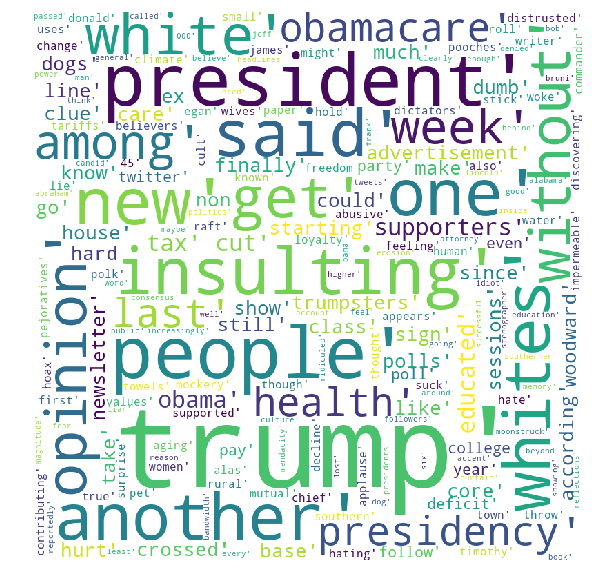

In [104]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = _stopwords, 
                min_font_size = 8).generate(test_cloud) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()